## Final Project Submission

Please fill out:
* Student name: 
* Student pace: Full time
* Scheduled project review date/time: 17/04/2023 - 21/04/2023
* Instructor name: Antonny Muiko
* Blog post URL: 


### TItle: Predicting Home Sale Prices in King County, USA

**Explanation**
> * This project aims to predict the sale price of homes in King County, USA, based on various features such as the number of bedrooms, bathrooms, square footage, and location. The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Overview
This projects aims to analyze factors affecting house price in King County. Some of these factors are; location, year of construction, size, renovations done and many more. This would greatly help the agency get insights on how to cut down the costs and maximize the profit. 

### Business Problem
Our stakeholder is homeowners who are looking to renovate their homes and want to estimate the impact of these renovations on the value of their home. Our business problem is to identify which home features are most important in determining a home's sale price and estimate how much value can be added by improving these features.

In [61]:
# Import the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
plt.style.use('ggplot')

### Load the dataset into a data frame

In [62]:
# load the data into a data frame
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [63]:
rows, columns = df.shape
print(f'Nrows: {rows}, Ncolumns: {columns}')


Nrows: 21597, Ncolumns: 21


In [64]:
cols = df.columns
cols

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Understanding
The data used in this project is the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder. The dataset contains 21,597 records and 21 columns. The description of the column names can be found in column_names.md in the same folder. It contains 21 columns with each being either numerical or categorical data.

### Data processing
We will start by cleaning the data and handling missing values, if any. We will also convert some of the columns into the appropriate data type.

In [65]:
# Columns with null values
null_cols = df.columns[df.isna().any()]

# Count null values in each column and sort in descending order
count_null = df[null_cols].isna().sum().sort_values(ascending=False)

# print the null column and the count
for col, count in zip(null_cols, count_null):
    print(f'The {col} has {round(count/len(df)*100, 2)} % of the data missing')
    

The waterfront has 17.79 % of the data missing
The view has 11.0 % of the data missing
The yr_renovated has 0.29 % of the data missing


In [66]:
# Check for duplicates
duplicates = df['id'].duplicated().sum()
# duplicates = df.id.duplicated().sum()
print(f'The duplicated values are: {duplicates}')
print(f'Which translates into {round(duplicates/len(df) * 100, 2)}% of the total data.')

# Drop duplicated values:
df.drop_duplicates(subset='id', keep='last', inplace=True)



The duplicated values are: 177
Which translates into 0.82% of the total data.


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

**Dealing with the date columns**
* To be able to use the date columns we have to convert them into either and int or a datetime data type. The ```date``` column has been converted into ```datetime``` using the ```pd.datetime()``` function. The ```yr_renovated``` column which might be of help has been converted to datatype ```int```

In [68]:
df['date'] = pd.to_datetime(df['date'])
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)


### Data Analysis
To get most out of our data, we can begin by exploring a few distribution plots. For example, for our target variable ```price```

In [69]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1791.170215,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,828.692965,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


**Interpretation**
* The ```descibe()``` method used above gives us a summary table of all our continuous variables. From the table we can see the measures of central tendency like the mean, mode, mdeian and quartiles of various variables. We can also see the variability of the data by observing the standard deviations and the range

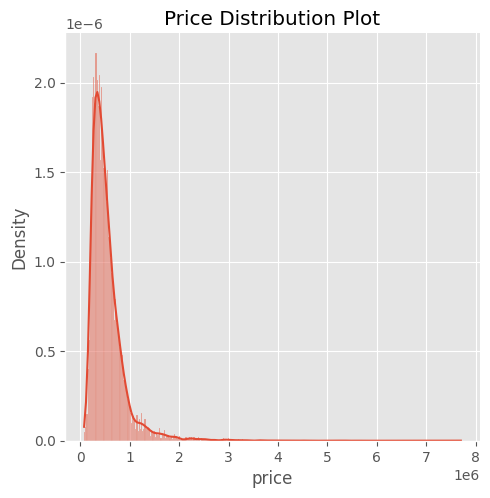

In [70]:
sns.displot(df['price'], kde=True, stat='density')
plt.title('Price Distribution Plot')
plt.show()

**Interpretions**
* The price distribution is positively skewed, which means there are more houses with lower price than higher price. 


**Correlation Matrix Plot**

In order to examine the correlation between the numeric variables and the target variable-price, we found it useful to display the information using a correlation heatmap.

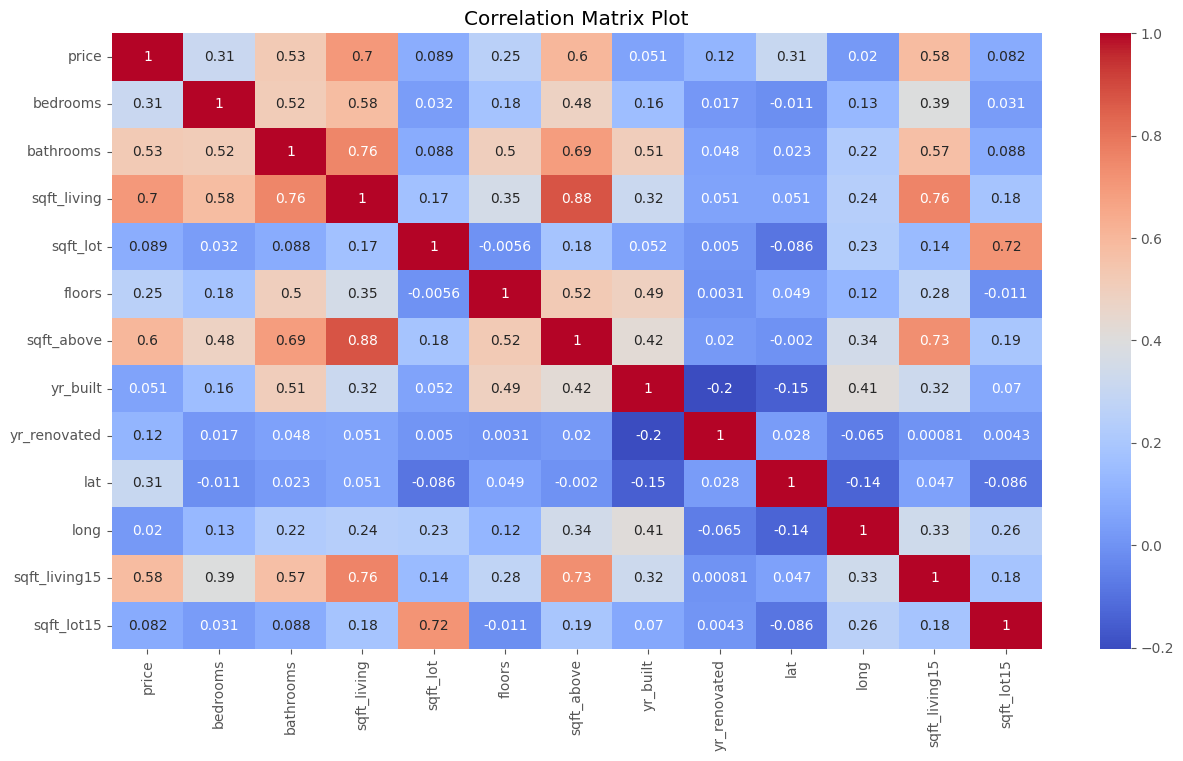

In [71]:
df_corr = df.drop(['id','zipcode'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

**Interpretation**
* From the above correlation matrix plot, We can see that numerical variables that have a higher correlation with price are; ```sqft_living```, ```sqft_above```, ```sqft_living15```,```bathrooms```, and  ```bedrooms```.
* We can also see that the variables with a weak positive correletion to price are ```sqft_lot```, ```sqft_lot15```, and ```yr_built```.

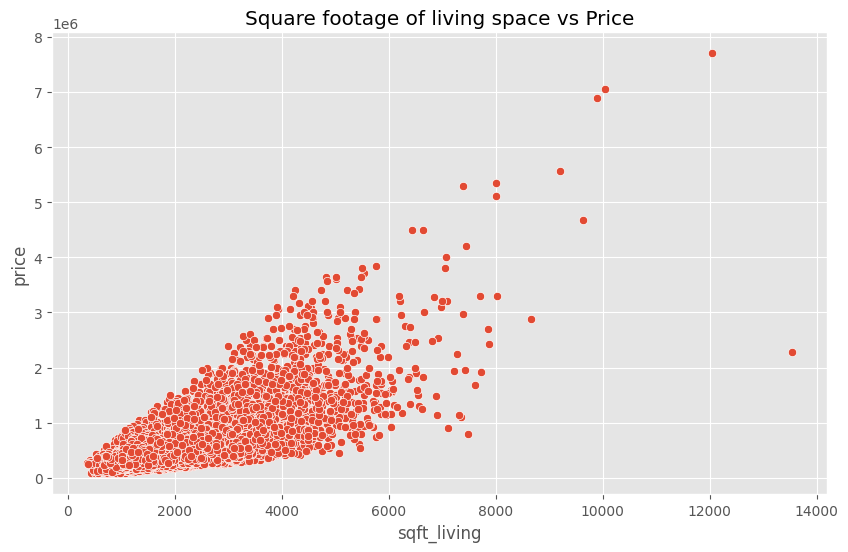

In [72]:
# Scatterplot of SquareFt Living vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Square footage of living space vs Price')
plt.show()

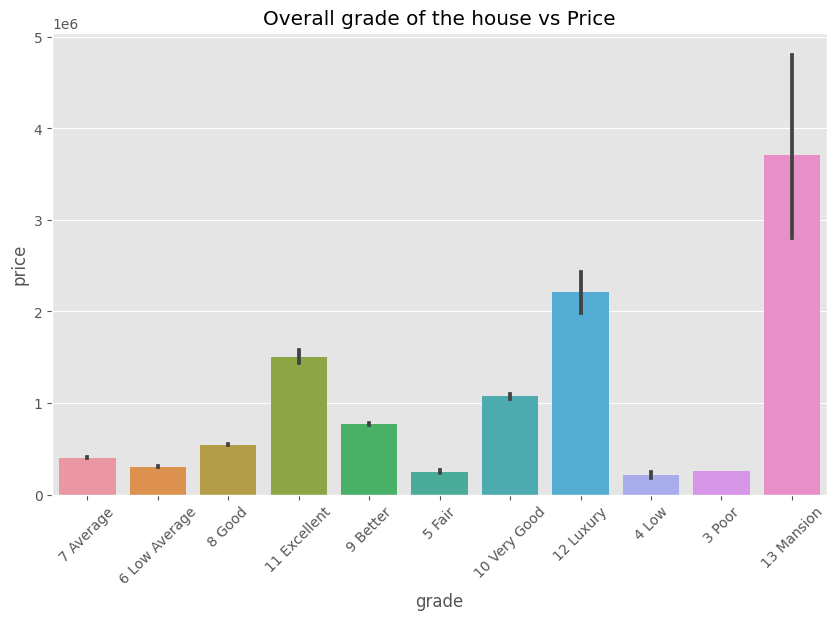

In [73]:
# Scatterplot of SquareFt Living vs Price
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='grade', y='price')
plt.title('Overall grade of the house vs Price')
plt.xticks(rotation=45)
plt.show()

In [74]:
### Linear regression model
X = df_corr.sqft_living
y = df_corr.price
formula = 'price ~ sqft_living'
model_linear = sm.ols(formula, data=df_corr).fit()
model_summary = model_linear.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.073e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:53:24   Log-Likelihood:            -2.9763e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.255e+04   4436.470     -9.591      

In [75]:
Intercept, Coefficient = model_linear.params
print(f'The linear regression equation: price = {Intercept:.2f} {Coefficient:.2f} Sqft_Living')

The linear regression equation: price = -42548.04 280.54 Sqft_Living


### Project Outline
* Introduction
> * Title
> * Explanation
* Business Problem
* Data Understanding
* Data processing
* Data analysis
> * Statistical tests and distributions
> * Visualizations
* Modeling
> * Linear regression
> * Multiple regression
* Interpretations and Recommendations
* Conclusion